# Mandelbrot exercise


In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
def mandelbrot(Re, Im, max_iter):
    c = complex(Re, Im)
    z = 0.0j
    
    for i in range(max_iter):
        z= z*z + c
        if(z.real*z.real + z.imag*z.imag) >= 50:
            return i
    return max_iter

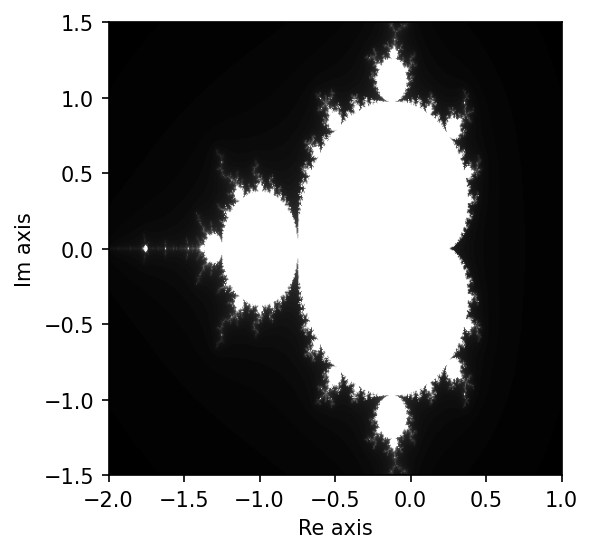

In [3]:
columns = 500
rows = 500

result = numpy.zeros([rows, columns])
for row_index, Re in enumerate(numpy.linspace(-2, 1, num=rows)):
    for column_index , Im in enumerate(numpy.linspace(-1, 1, num=columns)):
        result[row_index, column_index] = mandelbrot(Re, Im, 100)
        
plt.figure(dpi=150)
plt.imshow(result.T, extent = [-2,1,-1.5,1.5])
plt.xlabel("Re axis")
plt.ylabel("Im axis")
plt.gray()
plt.savefig('mandelbrot.png')
plt.show()

# Markov chains

In [4]:
import numpy as np
P = np.random.rand(5,5)
for row in range(P.shape[0]):
    P[row] /= np.sum(P[row])

print(P)
print(P.sum(axis=1))

import numpy as np
p = np.random.rand(1,5)
for row in range(p.shape[0]):
    p[row] /= np.sum(p[row])

print(p)
print(p.sum(axis=1))

[[0.00921827 0.36864689 0.15870586 0.26488877 0.19854022]
 [0.21636008 0.05770802 0.14264633 0.32119712 0.26208845]
 [0.26092215 0.1583916  0.23148247 0.25226642 0.09693735]
 [0.28230687 0.15395892 0.22391868 0.15235781 0.18745772]
 [0.39131792 0.09576336 0.17507433 0.32455486 0.01328952]]
[1. 1. 1. 1. 1.]
[[0.13936264 0.01827517 0.33100962 0.19299636 0.31835623]]
[1.]


In [5]:
def matrix_power(matrix, power):
    if power == 0:
        return np.identity(len(matrix))
    elif power == 1:
        return matrix
    else:
        return np.dot(matrix, matrix_power(matrix, power-1))

In [6]:
p50 = np.dot(p,matrix_power(P,50))
print(p50)

[[0.22300375 0.17646705 0.18872346 0.25338235 0.15842339]]


In [7]:
from numpy import linalg as LA
temp = LA.eig(P)
eigen_vector_1 = temp[1][0]
print(eigen_vector_1)
temp2=eigen_vector_1/sum(eigen_vector_1)
print(temp2)
sum(temp2)

[-0.4472136 +0.j          0.36580821+0.j         -0.45616327+0.37491573j
 -0.45616327-0.37491573j  0.33499084+0.j        ]
[ 0.67889129-0.j         -0.55531409-0.j          0.69247733-0.56913973j
  0.69247733+0.56913973j -0.50853186-0.j        ]


(1+0j)

In [8]:
diff = abs(temp2-p50)
diff <= 0.00001

array([[False, False, False, False, False]])

# Importing libraries

In [9]:
from sympy import *
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os
x, y = symbols("x y")

# Defining Taylor Approximation function

In [10]:
def taylor_approx(function, start, end, degree, fixed_c):
    from itertools import count, takewhile
    def frange(start, stop, step):
        return takewhile(lambda x: x< stop, count(start, step))
    x, y = symbols("x y")
    c=(end-start)/degree
    inputs = []
    for q in frange(start, end, c):
        inputs.append(q)
    value = []
    n: int = degree
    x0 = fixed_c
    func = function
    result = func.subs(x, x0)
    for i in range(1, n):
        result += diff(func, x, i).subs(x, x0) * ((x - x0)**i)/(factorial(i))
    z=result
    for p in frange(start, end, c):
        terms = z.subs(x,p)
        value.append(terms)
    plt.plot(inputs,value, 'ro')
    plt.xlabel("x value")
    plt.ylabel("F(x)")
    #pretty_print(result) uncomment this to see the array output (answer to question #1)

# Running sample

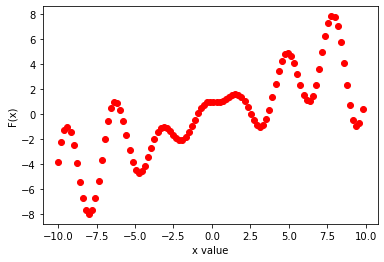

In [11]:
taylor_approx(x*sin(x)**2+cos(x), -10, 10, 99, 0)

# Taylor approximation vs Actual trend

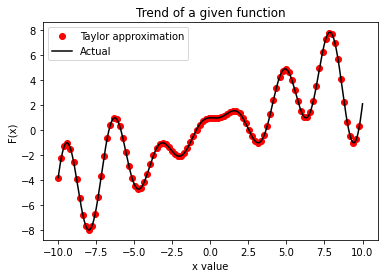

In [12]:
function = x*sin(x)**2+cos(x)
start = -10
end = 10
degree = 99
fixed_c = 0

from itertools import count, takewhile
def frange(start, stop, step):
    return takewhile(lambda x: x< stop, count(start, step))
x, y = symbols("x y")
c=(end-start)/degree
inputs = []
for q in frange(start, end, c):
    inputs.append(q)
value = []
n: int = degree
x0 = fixed_c
func = function
result = func.subs(x, x0)
for i in range(1, n):
    result += diff(func, x, i).subs(x, x0) * ((x - x0)**i)/(factorial(i))
z=result
for p in frange(start, end, c):
    terms = z.subs(x,p)
    value.append(terms)

def f(x):
    return x*sin(x)**2+cos(x)

a=degree*100
plt.figure()
plt.plot(inputs,value, 'ro')
plt.xlabel("x value")
plt.ylabel("F(x)")
xvals1 = np.linspace(start,end,a)
yvals1 = list(map(f, xvals1))
plt.plot(xvals1, yvals1, 'k')
plt.title('Trend of a given function')
plt.legend(['Taylor approximation', 'Actual'])   
plt.show()

# Bonus Question

In [13]:
def bonus_question(function, start, end, degree, fixed_c, initial_degree, final_degree, degree_step):
    import time
    start_time = time.time()
    from itertools import count, takewhile
    def frange(start, stop, step):
        return takewhile(lambda x: x< stop, count(start, step))
    x, y = symbols("x y")
    degree = []
    for i in frange(initial_degree,final_degree+1,degree_step):
        degree.append(i)
    for i in (degree):
        c=(end-start)/int(i)
        inputs = []
        for q in frange(start, end, c):
            inputs.append(q)
        value = []
        n: int = int(i)
        x0 = fixed_c
        func = function
        result = func.subs(x, x0)
        for i in range(1, n+1):
            result += diff(func, x, i).subs(x, x0) * ((x - x0)**i)/(factorial(i))
        abs_error_list = []
        for p in frange(start, end, c):
            abs_error = abs(func.subs(x, p) - result.subs(x, p))
            abs_error_list.append(abs_error)
        print("\n")
        print(f"Sum of Absolute Error at {i}th step: ", float(sum(abs_error_list)))
        print("\n")
        print("Execution time in seconds %s" % (time.time() - start_time))

In [14]:
bonus_question(x*sin(x)**2+cos(x), -10, 10, 99, 0,50,100,10)



Sum of Absolute Error at 50th step:  20.631290408746537


Execution time in seconds 0.5866098403930664


Sum of Absolute Error at 60th step:  0.0008066172797044922


Execution time in seconds 1.4099547863006592


Sum of Absolute Error at 70th step:  1.7772560184551773e-07


Execution time in seconds 2.486963987350464


Sum of Absolute Error at 80th step:  2.4570218298921125e-07


Execution time in seconds 3.730133056640625


Sum of Absolute Error at 90th step:  3.524657251054266e-07


Execution time in seconds 5.702224969863892


Sum of Absolute Error at 100th step:  5.550307430888977e-07


Execution time in seconds 8.006710767745972
